In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
from plotnine import *
%matplotlib inline

In [2]:
FOLDER_PATH = os.path.join(os.path.dirname(os.getcwd()),'datasets','Melbourne_housing_dataset_full.csv')

In [3]:
def load_data(folder_path = FOLDER_PATH):
    return pd.read_csv(FOLDER_PATH,index_col=0)

In [4]:
housing_df = load_data()

In [5]:
# check to see if the data loaded correctly
housing_df.head(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0
10,Abbotsford,129 Charles St,2,h,941000.0,S,Jellis,7/05/2016,2.5,3067.0,...,1.0,0.0,181.0,NaN,NaN,Yarra,-37.8041,144.9953,Northern Metropolitan,4019.0
11,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4019.0
14,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.8060,144.9954,Northern Metropolitan,4019.0
15,Abbotsford,217 Langridge St,3,h,1000000.0,S,Jellis,8/10/2016,2.5,3067.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,4019.0
16,Abbotsford,18a Mollison St,2,t,745000.0,S,Jellis,8/10/2016,2.5,3067.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,4019.0


In [6]:
# printing info regarding various data types
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18396 entries, 1 to 23546
Data columns (total 21 columns):
Suburb           18396 non-null object
Address          18396 non-null object
Rooms            18396 non-null int64
Type             18396 non-null object
Price            18396 non-null float64
Method           18396 non-null object
SellerG          18396 non-null object
Date             18396 non-null object
Distance         18395 non-null float64
Postcode         18395 non-null float64
Bedroom2         14927 non-null float64
Bathroom         14925 non-null float64
Car              14820 non-null float64
Landsize         13603 non-null float64
BuildingArea     7762 non-null float64
YearBuilt        8958 non-null float64
CouncilArea      12233 non-null object
Lattitude        15064 non-null float64
Longtitude       15064 non-null float64
Regionname       18395 non-null object
Propertycount    18395 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 3.1+ MB


My first step was to understand what every feature name meant. For this purpose i referred the original data set on this [link](https://www.kaggle.com/gorantlarohan/melbourne-housing-price-prediction)

Upon realizing that Rooms and Bedroom2 were # of rooms captured from different sources, I decided to remove one of them. I naturally went with Rooms since it had more training examples

I also initially think there might be some correlation between Landsize and BuildingArea...lets see


In [7]:
# checking data for noise
housing_df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,18396.000000,1.839600e+04,18395.000000,18395.000000,14927.000000,14925.000000,14820.000000,13603.000000,7762.000000,8958.000000,15064.000000,15064.000000,18395.000000
mean,2.935040,1.056697e+06,10.389986,3107.140147,2.913043,1.538492,1.615520,558.116371,151.220219,1965.879996,-37.809849,144.996338,7517.975265
std,0.958202,6.419217e+05,6.009050,95.000995,0.964641,0.689311,0.955916,3987.326586,519.188596,37.013261,0.081152,0.106375,4488.416599
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.330000e+05,6.300000,3046.000000,2.000000,1.000000,1.000000,176.500000,93.000000,1950.000000,-37.858100,144.931193,4294.000000
50%,3.000000,8.800000e+05,9.700000,3085.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.803625,145.000920,6567.000000
75%,3.000000,1.302000e+06,13.300000,3149.000000,3.000000,2.000000,2.000000,651.000000,174.000000,2000.000000,-37.756270,145.060000,10331.000000
max,12.000000,9.000000e+06,48.100000,3978.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


Found something unusual with BuildingArea and LandSize having a min of 0(which is wrong)

Also YearBuilt has something unusual too with that some of the years date to 11th century \

We can actually remove certain attributes such as SellerG and Address

In [8]:
# visualizing all categorical types
# housing_df.drop(['SellerG','Address','Date','Postcode','Unnamed: 0'],inplace=True,axis=1)
column_mask = housing_df.dtypes == np.object
pd.crosstab(**housing_df.loc[:,column_mask].melt(var_name='columns', value_name='index'))

columns,Address,CouncilArea,Date,Method,Regionname,SellerG,Suburb,Type
index,,,,,,,,
1 Acheron Av,1,0,0,0,0,0,0,0
1 Adelle Ct,1,0,0,0,0,0,0,0
1 Airlie St,1,0,0,0,0,0,0,0
1 Albion Ct,1,0,0,0,0,0,0,0
1 Alexander St,1,0,0,0,0,0,0,0
1 Alma St,1,0,0,0,0,0,0,0
1 Ann St,1,0,0,0,0,0,0,0
1 Anthony St,1,0,0,0,0,0,0,0
1 Arnot St,1,0,0,0,0,0,0,0


There are many ways it seems that a target variable can be chosen. The most obvious bet would be to choose Price. However we can also problem the question as a clustering question, "Given a set of features, is it possible to find the bucket within which the price is likely to lie?"

In [9]:
# looking at the number of missing values in each column with their proportions
housing_df.isnull().sum()*100/len(housing_df)

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price             0.000000
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.005436
Postcode          0.005436
Bedroom2         18.857360
Bathroom         18.868232
Car              19.439008
Landsize         26.054577
BuildingArea     57.806045
YearBuilt        51.304631
CouncilArea      33.501848
Lattitude        18.112633
Longtitude       18.112633
Regionname        0.005436
Propertycount     0.005436
dtype: float64

There are a lot of missing values!!

In [10]:
# dropping all the missing value rows
housing_df.dropna(inplace=True)
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6196 entries, 2 to 19739
Data columns (total 21 columns):
Suburb           6196 non-null object
Address          6196 non-null object
Rooms            6196 non-null int64
Type             6196 non-null object
Price            6196 non-null float64
Method           6196 non-null object
SellerG          6196 non-null object
Date             6196 non-null object
Distance         6196 non-null float64
Postcode         6196 non-null float64
Bedroom2         6196 non-null float64
Bathroom         6196 non-null float64
Car              6196 non-null float64
Landsize         6196 non-null float64
BuildingArea     6196 non-null float64
YearBuilt        6196 non-null float64
CouncilArea      6196 non-null object
Lattitude        6196 non-null float64
Longtitude       6196 non-null float64
Regionname       6196 non-null object
Propertycount    6196 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 1.0+ MB


In [11]:
# check correlation between BuildingArea and Landsize
housing_df.loc[:,['BuildingArea','Landsize']].corr()

,BuildingArea,Landsize
BuildingArea,1.000000,0.084825
Landsize,0.084825,1.000000


In [12]:
housing_df = housing_df[housing_df.YearBuilt > 1800]
housing_df = housing_df[(housing_df.Landsize < 25000)]
housing_df = housing_df[housing_df.BuildingArea < 2000]
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6193 entries, 2 to 19739
Data columns (total 21 columns):
Suburb           6193 non-null object
Address          6193 non-null object
Rooms            6193 non-null int64
Type             6193 non-null object
Price            6193 non-null float64
Method           6193 non-null object
SellerG          6193 non-null object
Date             6193 non-null object
Distance         6193 non-null float64
Postcode         6193 non-null float64
Bedroom2         6193 non-null float64
Bathroom         6193 non-null float64
Car              6193 non-null float64
Landsize         6193 non-null float64
BuildingArea     6193 non-null float64
YearBuilt        6193 non-null float64
CouncilArea      6193 non-null object
Lattitude        6193 non-null float64
Longtitude       6193 non-null float64
Regionname       6193 non-null object
Propertycount    6193 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 1.0+ MB


It should also make sense to remove the rows corresponding to the noise

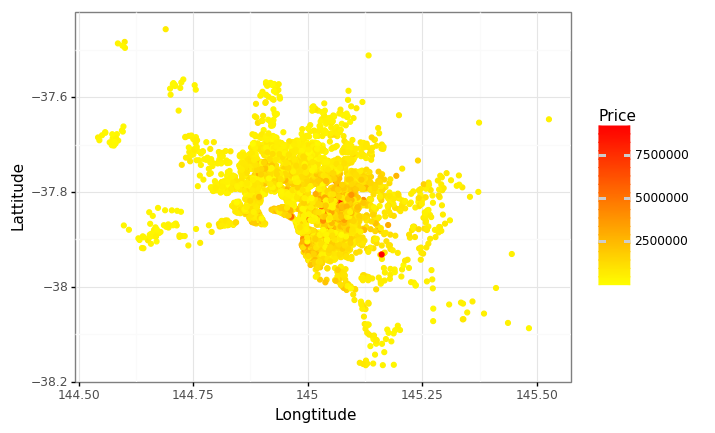

<ggplot: (-9223372029309502327)>


In [13]:
# plot latitude,longitude and price
# housing_df.plot(kind="scatter",x='Longtitude',y='Lattitude',c=housing_df['Price']/100,cmap=plt.get_cmap('viridis'),figsize=(15,10))
# plt.xlabel('Longtitude')
# plt.title('Price over lat-long')
# plt.show()

lat_long_price = ggplot(housing_df,aes(y='Lattitude',x='Longtitude')) + geom_point(aes(colour='Price'))+ scale_colour_gradient(low='yellow',high='red') + theme_bw()
print(lat_long_price)


Clearly, the houses situated near the center, somewhat near CBD, seems to fetch a high price

In [14]:
# we can see if Price is affected by which region the house is in.
housing_df.groupby(['Regionname']).mean()['Price'].sort_values(ascending=False)

Regionname
Southern Metropolitan         1.378086e+06
Eastern Metropolitan          1.110184e+06
South-Eastern Metropolitan    9.304847e+05
Northern Metropolitan         8.722635e+05
Western Metropolitan          8.677042e+05
Eastern Victoria              6.699992e+05
Northern Victoria             5.568947e+05
Western Victoria              3.910714e+05
Name: Price, dtype: float64

Clearly, Southern Metropolitan has the highest mean price

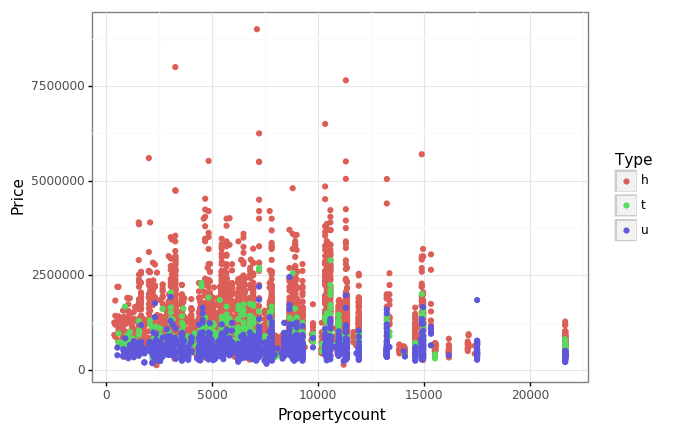

<ggplot: (-9223372029309548365)>


In [15]:
g = ggplot(housing_df, aes(x='Propertycount', y='Price')) + geom_point(aes(colour='Type')) + theme_bw()
print(g)

We can clearly see that houses of type house fetch the most price

CBD is a major city in Melbourne. It will be interesting to see how Price varies with Distance

/anaconda3/lib/python3.7/site-packages/plotnine/guides/guides.py:198: UserWarning: Cannot generate legend for the 'color' aesthetic. Make sure you have mapped a variable to it
  "variable to it".format(output))


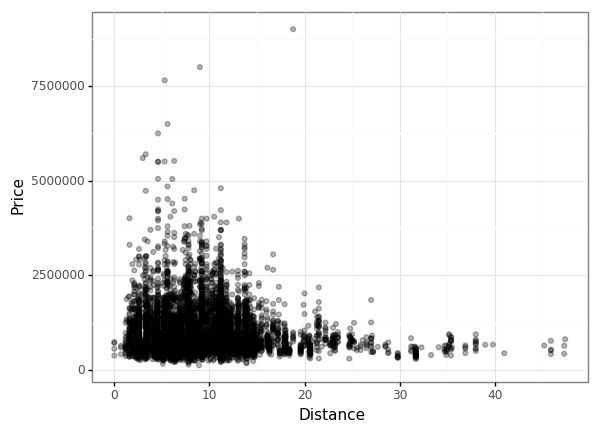

<ggplot: (-9223372036578839352)>


In [16]:
g = ggplot(housing_df,aes(x='Distance',y='Price')) + geom_point(alpha=0.3) + scale_colour_gradient(low="blue",high="white") + theme_bw()
print(g)

It is interesting to note that as the distance from CBD increases, Price reduces which was to be expected!!

We can also analysize the effect of cars and bathrooms on Price

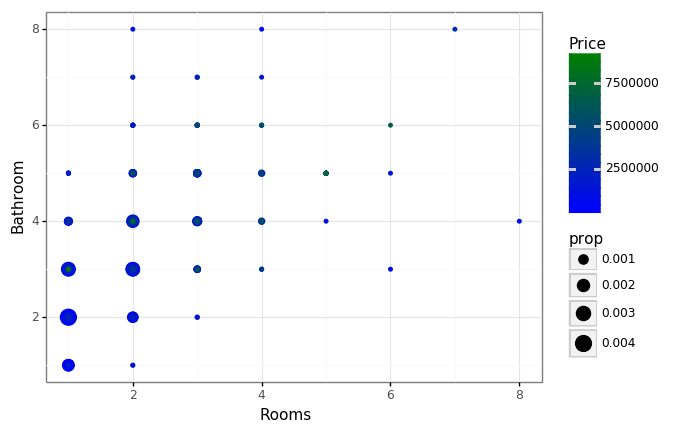

<ggplot: (7545175430)>


In [17]:
g = ggplot(housing_df,aes(x='Bathroom',y='Rooms')) + geom_count(aes(color="Price")) + scale_color_gradient(low='blue',high="green") + theme_bw() + xlab("Rooms") + ylab("Bathroom") + labs(price='Price')
print(g)

We can also analysize car with rooms 

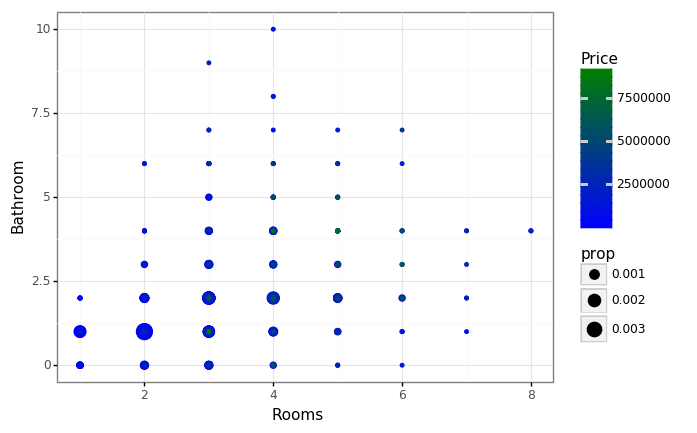

<ggplot: (-9223372029309589304)>


In [18]:
g = ggplot(housing_df,aes(x='Rooms',y='Car')) + geom_count(aes(color="Price")) + scale_color_gradient(low='blue',high="green") + theme_bw() + xlab("Rooms") + ylab("Bathroom") + labs(price='Price')
print(g)

In [19]:
#plotting correlation
housing_df.corr()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.533091,0.284009,0.051044,0.951750,0.614088,0.422327,0.122682,0.656528,-0.069700,0.016290,0.087670,-0.111715
Price,0.533091,1.000000,-0.148966,0.125403,0.514124,0.504087,0.260930,0.100539,0.570303,-0.314135,-0.213448,0.211485,-0.046676
Distance,0.284009,-0.148966,1.000000,0.405635,0.290375,0.124791,0.273843,0.076799,0.177456,0.257649,-0.094372,0.221668,-0.084243
Postcode,0.051044,0.125403,0.405635,1.000000,0.053579,0.109949,0.043489,0.036318,0.084758,0.027247,-0.425098,0.471192,0.064341
Bedroom2,0.951750,0.514124,0.290375,0.053579,1.000000,0.617991,0.425507,0.120604,0.639613,-0.057403,0.021557,0.085527,-0.109700
Bathroom,0.614088,0.504087,0.124791,0.109949,0.617991,1.000000,0.341273,0.084607,0.584197,0.160600,-0.072135,0.116343,-0.066944
Car,0.422327,0.260930,0.273843,0.043489,0.425507,0.341273,1.000000,0.133758,0.352941,0.121836,0.012481,0.053977,-0.047226
Landsize,0.122682,0.100539,0.076799,0.036318,0.120604,0.084607,0.133758,1.000000,0.111779,0.025303,0.003324,0.045900,-0.016443
BuildingArea,0.656528,0.570303,0.177456,0.084758,0.639613,0.584197,0.352941,0.111779,1.000000,0.012713,-0.039030,0.109596,-0.074715
YearBuilt,-0.069700,-0.314135,0.257649,0.027247,-0.057403,0.160600,0.121836,0.025303,0.012713,1.000000,0.056269,0.002577,0.003948


We can see that bathrooms and rooms are highly correlated. 

Also we can remove Bedroom2 since thats redundant

In [20]:
housing_df.drop(['Bedroom2'],axis=1,inplace=True)

We can use logistic regression to fill the missing values for bathrooms

We can also drop year built.

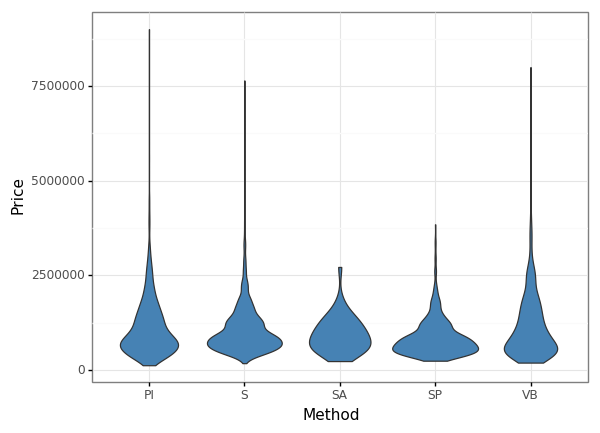

<ggplot: (275932231)>


In [21]:
# plot of method vs price
g = ggplot(housing_df, aes(x='Method', y='Price')) + geom_violin(fill="steelblue") + theme_bw() + xlab("Method") + ylab("Price")
print(g)


In [22]:
import numpy as np

housing_copy = housing_df.select_dtypes(include=np.object)
housing_copy

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
2,Abbotsford,25 Bloomburg St,h,S,Biggin,4/02/2016,Yarra,Northern Metropolitan
4,Abbotsford,5 Charles St,h,SP,Biggin,4/03/2017,Yarra,Northern Metropolitan
6,Abbotsford,55a Park St,h,VB,Nelson,4/06/2016,Yarra,Northern Metropolitan
11,Abbotsford,124 Yarra St,h,S,Nelson,7/05/2016,Yarra,Northern Metropolitan
14,Abbotsford,98 Charles St,h,S,Nelson,8/10/2016,Yarra,Northern Metropolitan
18,Abbotsford,10 Valiant St,h,S,Biggin,8/10/2016,Yarra,Northern Metropolitan
24,Abbotsford,40 Nicholson St,h,VB,Nelson,12/11/2016,Yarra,Northern Metropolitan
25,Abbotsford,123/56 Nicholson St,u,S,Biggin,12/11/2016,Yarra,Northern Metropolitan
30,Abbotsford,16 William St,h,S,Jellis,15/10/2016,Yarra,Northern Metropolitan
32,Abbotsford,42 Henry St,h,S,Jellis,16/07/2016,Yarra,Northern Metropolitan


In [23]:
housing_copy.isnull().sum()

Suburb         0
Address        0
Type           0
Method         0
SellerG        0
Date           0
CouncilArea    0
Regionname     0
dtype: int64

In [24]:
# from sklearn.preprocessing import LabelBinarizer
# lb = LabelBinarizer()
# lb_results = lb.fit_transform(housing_df['Regionname'])
# lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)

# lb_results1 = lb.fit_transform(housing_df['Method'])
# lb_results_df1 = pd.DataFrame(lb_results1,columns = lb.classes_)

# lb_results2 = lb.fit_transform(housing_df['Type'])
# lb_results_df2 = pd.DataFrame(lb_results2,columns = lb.classes_)


In [25]:
housing_df = housing_df.reset_index(drop=True)

In [26]:
# housing_data = pd.concat([housing_df,lb_results_df1,lb_results_df2,lb_results_df],axis=1)
housing_data = housing_df.copy()
housing_data.drop(['Regionname','Method','Type','CouncilArea','Suburb','Address','SellerG','Date'],axis=1,inplace=True)


In [27]:
# housing_data.drop(['Propertycount','age','Landsize','Car'],axis=1,inplace=True)
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6193 entries, 0 to 6192
Data columns (total 12 columns):
Rooms            6193 non-null int64
Price            6193 non-null float64
Distance         6193 non-null float64
Postcode         6193 non-null float64
Bathroom         6193 non-null float64
Car              6193 non-null float64
Landsize         6193 non-null float64
BuildingArea     6193 non-null float64
YearBuilt        6193 non-null float64
Lattitude        6193 non-null float64
Longtitude       6193 non-null float64
Propertycount    6193 non-null float64
dtypes: float64(11), int64(1)
memory usage: 580.7 KB


In [28]:
X = housing_data.drop(['Price'],axis=1)
y = housing_data.Price

X

,Rooms,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,2,2.5,3067.0,1.0,0.0,156.0,79.00,1900.0,-37.80790,144.99340,4019.0
1,3,2.5,3067.0,2.0,0.0,134.0,150.00,1900.0,-37.80930,144.99440,4019.0
2,4,2.5,3067.0,1.0,2.0,120.0,142.00,2014.0,-37.80720,144.99410,4019.0
3,3,2.5,3067.0,2.0,0.0,245.0,210.00,1910.0,-37.80240,144.99930,4019.0
4,2,2.5,3067.0,1.0,2.0,256.0,107.00,1890.0,-37.80600,144.99540,4019.0
5,2,2.5,3067.0,1.0,2.0,220.0,75.00,1900.0,-37.80100,144.99890,4019.0
6,3,2.5,3067.0,2.0,2.0,214.0,190.00,2005.0,-37.80850,144.99640,4019.0
7,2,2.5,3067.0,2.0,1.0,0.0,94.00,2009.0,-37.80780,144.99650,4019.0
8,2,2.5,3067.0,1.0,2.0,238.0,97.00,1890.0,-37.80900,144.99760,4019.0
9,3,2.5,3067.0,2.0,1.0,113.0,110.00,1880.0,-37.80560,144.99300,4019.0


In [29]:
# from sklearn.preprocessing import MinMaxScaler
# min_max = MinMaxScaler()
# X = min_max.fit_transform(X)

In [30]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics,preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

for i in range(1,4):
    print(f'Iteration number:{i}\n\n')
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
    pd.concat([X_train,y_train],axis=1).to_csv(f'train_{i}.csv')
    pd.concat([X_test,y_test],axis=1).to_csv(f'test_{i}.csv')
    lr = LinearRegression()
    lr.fit(X_train,y_train)
    y_pred = lr.predict(X_test)
    pd.DataFrame({'Price': y_pred}).to_csv(f'pred_linear_{i}.csv')
    acc_score = lr.score(X_test,y_test)
    print(f'RMSE score: {np.sqrt(metrics.mean_squared_error(y_test,y_pred))}')
    print(f'Accuracy Score is: {acc_score*100}')
    
    forest = RandomForestRegressor(n_estimators=100,random_state=42)
    forest.fit(X_train,y_train)
    y_pred = forest.predict(X_test)
    pd.DataFrame({'Price': y_pred}).to_csv(f'pred_rf_{i}.csv')
    acc_score = forest.score(X_test,y_test)
    print('RANDOM FOREST:')
    print(f'RMSE score: {np.sqrt(metrics.mean_squared_error(y_test,y_pred))}')
    print(f'Accuracy Score is: {acc_score*100}\n\n')


Iteration number:1


RMSE score: 454245.4665560397
Accuracy Score is: 51.755821720847585
RANDOM FOREST:
RMSE score: 334311.62360679917
Accuracy Score is: 73.86836016461706


Iteration number:2


RMSE score: 415005.30514506216
Accuracy Score is: 63.03103897859722
RANDOM FOREST:
RMSE score: 311809.7641939593
Accuracy Score is: 79.13062850487982


Iteration number:3


RMSE score: 378675.9359253976
Accuracy Score is: 66.5059225099929
RANDOM FOREST:
RMSE score: 286762.6865117629
Accuracy Score is: 80.79218843249816




In [31]:
# from sklearn.model_selection import train_test_split
# from sklearn import metrics,preprocessing
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [32]:
# from sklearn.linear_model import LinearRegression
# lr = LinearRegression()
# lr.fit(X_train,y_train)
# y_pred = lr.predict(X_test)
# acc_score = lr.score(X_test,y_test)

In [33]:
# print('RMSE score: {}'.format(np.sqrt(metrics.mean_squared_error(y_test,y_pred))))
# print('Accuracy Score is: {}'.format(acc_score*100))

For linear regression, we obtain the above result

In [34]:
# from sklearn.ensemble import RandomForestRegressor
# forest = RandomForestRegressor(n_estimators=100,random_state=42)
# forest.fit(X_train,y_train)
# y_pred = forest.predict(X_test)
# acc_score = forest.score(X_test,y_test)
# print('RANDOM FOREST:\n')
# print('RMSE score: {}'.format(np.sqrt(metrics.mean_squared_error(y_test,y_pred))))
# print('Accuracy Score is: {}'.format(acc_score*100))

In [35]:
import seaborn as sns

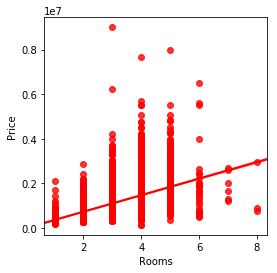

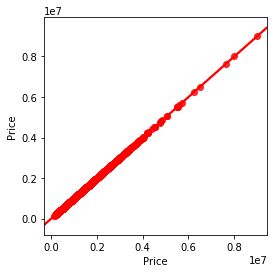

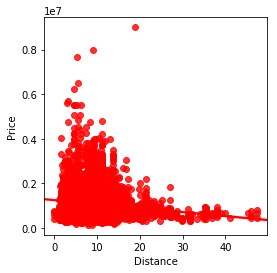

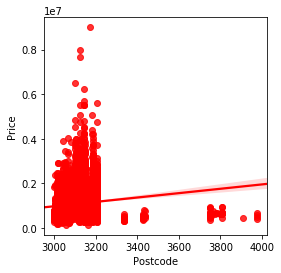

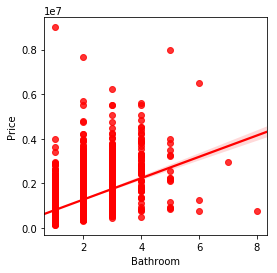

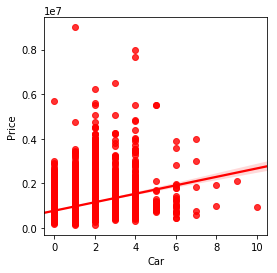

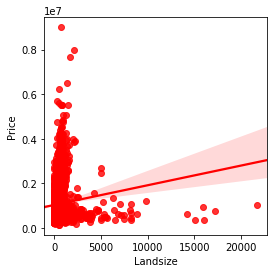

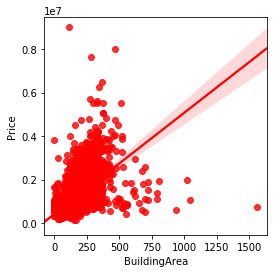

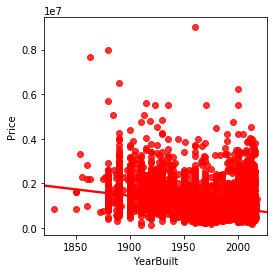

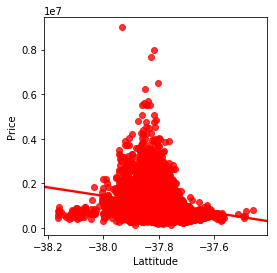

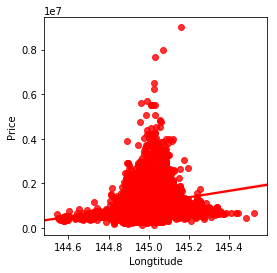

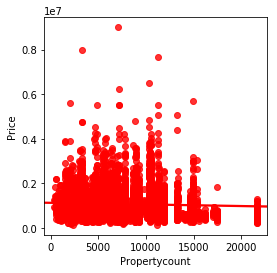

In [36]:
for col in housing_data:
    plt.figure(figsize=(4,4))
    sns.regplot(data=housing_data,x=col,y='Price',marker='o',color='red')
    plt.show()

Clearly rooms have the most positive impact and CBD distance have the most negative impact on housing prices